In [29]:
import sys
import os
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [30]:
sys.path.insert(0, '../../')
from scale_rl.common.wandb_utils import *

#### Collect Results

In [31]:
abl_df = read_and_concatenate_eval_df(directory_path='../../results/hypersimba/design_study')
base_df = read_and_concatenate_eval_df(directory_path='../../results/hypersimba')

eval_df = pd.concat([abl_df, base_df])
print(eval_df['exp_name'].unique())
eval_df

['k_scaler_scale_1' 'e_mse_loss' 'g_no_rew_bound' 'j_scaler_init_1'
 'f_no_rew_normalize' 'i_no_lr_decay' 'b_no_shift' 'h_hard_target_copy'
 'c_shift_1' 'l_alpha_init_05' 'a_no_input_norm' 'm_alpha_scale_1'
 'd_resize_proj' 'hypersimba']


,exp_name,env_name,seed,metric,env_step,value
0,k_scaler_scale_1,h1-pole-v0,9000,avg_return,0.0,35.859411
1,k_scaler_scale_1,h1-pole-v0,9000,avg_return,100000.0,142.686500
2,k_scaler_scale_1,h1-pole-v0,9000,avg_return,200000.0,547.310449
3,k_scaler_scale_1,h1-pole-v0,9000,avg_return,300000.0,533.528960
4,k_scaler_scale_1,h1-pole-v0,9000,avg_return,400000.0,674.806596
...,...,...,...,...,...,...
13535,hypersimba,HalfCheetah-v4,0,avg_success,800000.0,0.000000
13536,hypersimba,HalfCheetah-v4,0,avg_success,850000.0,0.000000
13537,hypersimba,HalfCheetah-v4,0,avg_success,900000.0,0.000000
13538,hypersimba,HalfCheetah-v4,0,avg_success,950000.0,0.000000


#### Visualize Results

In [48]:
from rliable import library as rly
from rliable import metrics as rly_metrics
from rliable import plot_utils as rly_plot_utils

aggregate_func = lambda x: np.array([
  rly_metrics.aggregate_iqm(x),
  rly_metrics.aggregate_median(x),
  rly_metrics.aggregate_mean(x),
  rly_metrics.aggregate_optimality_gap(x)])

In [49]:
from scale_rl.envs.mujoco import MUJOCO_ALL, MUJOCO_RANDOM_SCORE, MUJOCO_TD3_SCORE
from scale_rl.envs.dmc import DMC_EASY_MEDIUM, DMC_HARD
from scale_rl.envs.humanoid_bench import HB_LOCOMOTION_NOHAND, HB_RANDOM_SCORE, HB_SUCCESS_SCORE
from scale_rl.envs.myosuite import MYOSUITE_TASKS

In [50]:
def replace_hypen_to_underbar(env_name_list):
    for idx in range(len(env_name_list)):
        env_name_list[idx] = env_name_list[idx].replace('-', '_')
    return env_name_list

def replace_hyphen_in_dict_keys(old_dict):
    new_dict = {}
    for k, v in old_dict.items():
        new_key = k.replace('-', '_')  # <--- direct string replace
        new_dict[new_key] = v
    return new_dict

MUJOCO_ALL = replace_hypen_to_underbar(MUJOCO_ALL)
DMC_EM = replace_hypen_to_underbar(DMC_EASY_MEDIUM)
DMC_HARD = replace_hypen_to_underbar(DMC_HARD)
MYOSUITE_TASKS = replace_hypen_to_underbar(MYOSUITE_TASKS)
HB_LOCOMOTION_NOHAND = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND)

MUJOCO_RANDOM_SCORE = replace_hyphen_in_dict_keys(MUJOCO_RANDOM_SCORE)
MUJOCO_TD3_SCORE = replace_hyphen_in_dict_keys(MUJOCO_TD3_SCORE)
HB_RANDOM_SCORE = replace_hyphen_in_dict_keys(HB_RANDOM_SCORE)
HB_SUCCESS_SCORE = replace_hyphen_in_dict_keys(HB_SUCCESS_SCORE)

eval_df['env_name'] = eval_df['env_name'].str.replace('-', '_')
eval_df

,exp_name,env_name,seed,metric,env_step,value
0,k_scaler_scale_1,h1_pole_v0,9000,avg_return,0.0,35.859411
1,k_scaler_scale_1,h1_pole_v0,9000,avg_return,100000.0,142.686500
2,k_scaler_scale_1,h1_pole_v0,9000,avg_return,200000.0,547.310449
3,k_scaler_scale_1,h1_pole_v0,9000,avg_return,300000.0,533.528960
4,k_scaler_scale_1,h1_pole_v0,9000,avg_return,400000.0,674.806596
...,...,...,...,...,...,...
13535,hypersimba,HalfCheetah_v4,0,avg_success,800000.0,0.000000
13536,hypersimba,HalfCheetah_v4,0,avg_success,850000.0,0.000000
13537,hypersimba,HalfCheetah_v4,0,avg_success,900000.0,0.000000
13538,hypersimba,HalfCheetah_v4,0,avg_success,950000.0,0.000000


In [51]:
cur_exp_names = eval_df['exp_name'].unique()
cur_exp_names

array(['k_scaler_scale_1', 'e_mse_loss', 'g_no_rew_bound',
       'j_scaler_init_1', 'f_no_rew_normalize', 'i_no_lr_decay',
       'b_no_shift', 'h_hard_target_copy', 'c_shift_1', 'l_alpha_init_05',
       'a_no_input_norm', 'm_alpha_scale_1', 'd_resize_proj',
       'hypersimba'], dtype=object)

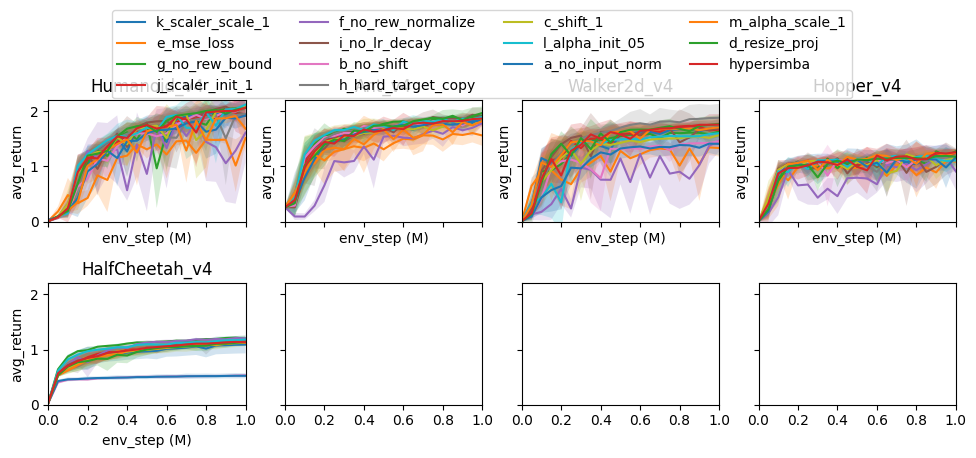

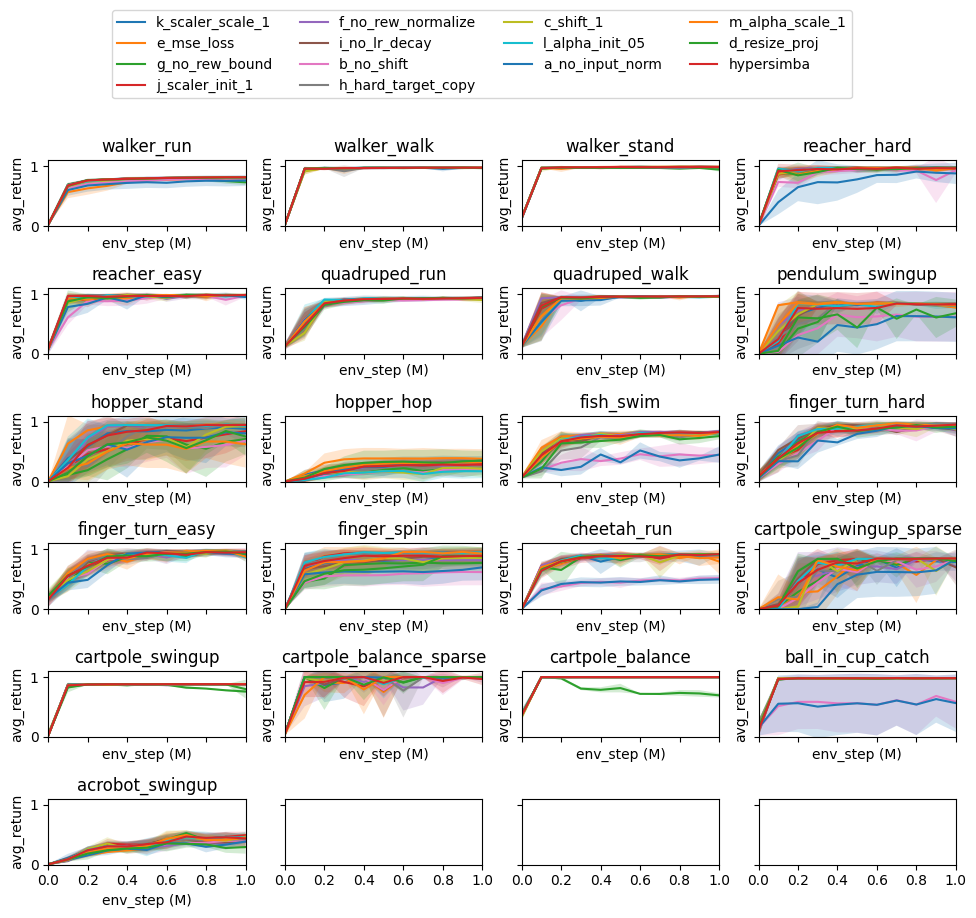

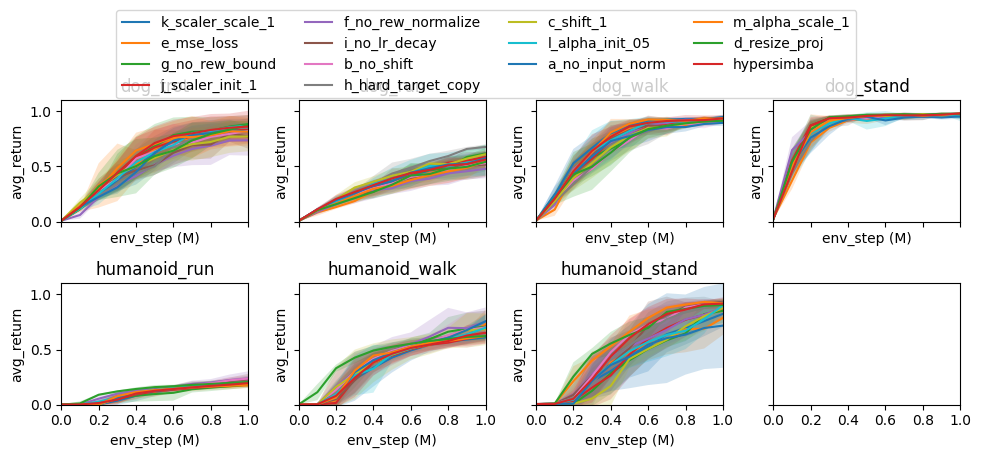

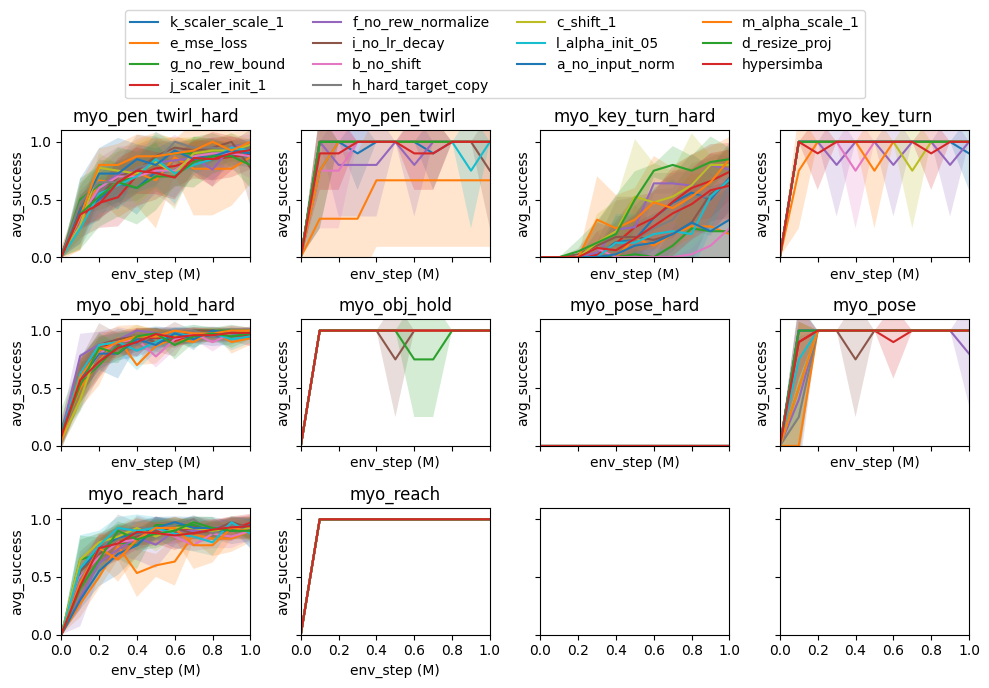

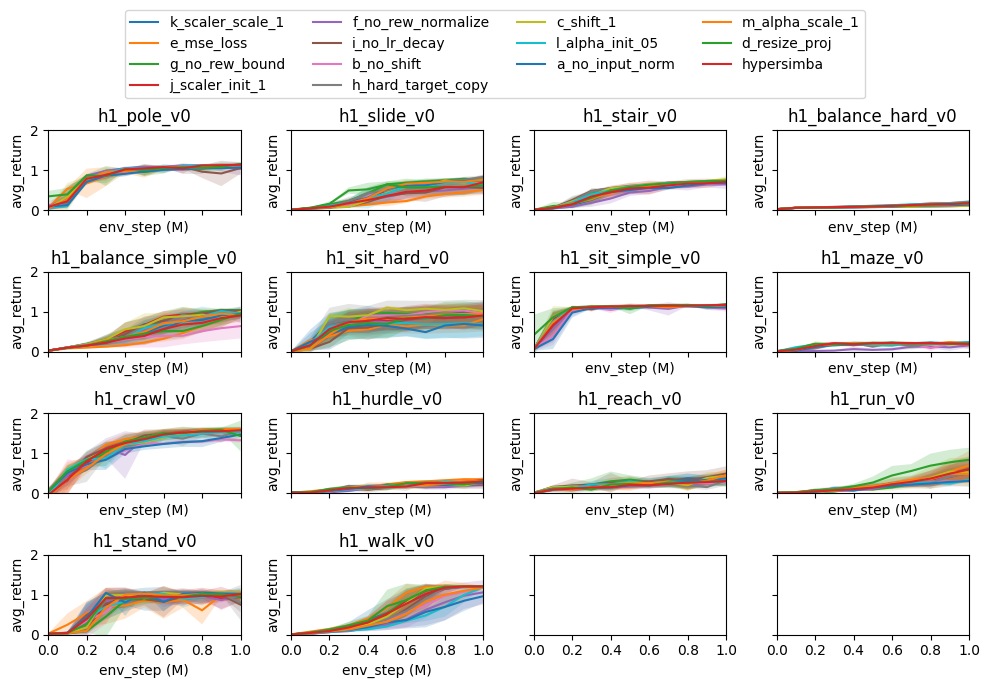

In [52]:
all_metric_mats = defaultdict(lambda: defaultdict(list))

for env_type in ["MUJOCO", "DMC_EM", "DMC_HARD", "MYOSUITE", "HB"]:
    if env_type == "MUJOCO":
        env_list = MUJOCO_ALL
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 4
        y_lim_max = 2.2

    elif env_type == "DMC_EM":
        env_list = DMC_EM
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 8
        y_lim_max = 1.1

    elif env_type == "DMC_HARD":
        env_list = DMC_HARD
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 4
        y_lim_max = 1.1

    elif env_type == "MYOSUITE":
        env_list = MYOSUITE_TASKS
        env_step = 1e6
        metric_type = "avg_success"
        plot_height = 6
        y_lim_max = 1.1

    elif env_type == "HB":
        env_list = HB_LOCOMOTION_NOHAND
        env_step = 1e6
        metric_type = "avg_return"
        plot_height = 6
        y_lim_max = 2.0

    # Filter eval_df for current environment set and experiments
    _eval_df = eval_df[eval_df["env_name"].isin(env_list)]
    _eval_df = _eval_df[_eval_df["exp_name"].isin(cur_exp_names)]

    # Additional environment-specific normalization, etc.
    if env_type == "MUJOCO":
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df,
            MUJOCO_RANDOM_SCORE,
            MUJOCO_TD3_SCORE,
        )
    elif env_type in ["DMC_EM", "DMC_HARD"]:
        _eval_df.loc[:, "value"] /= 1000.0
    elif env_type == "HB":
        _eval_df = normalize_score_with_random_and_base_score(
            _eval_df,
            HB_RANDOM_SCORE,
            HB_SUCCESS_SCORE,
        )

    # (Optional) plot metric history for each environment in this env_type
    plot_metric_history_per_env(
        _eval_df,
        num_plots_per_row=4,
        metric=metric_type,
        x_lim_max=env_step,
        y_lim_max=y_lim_max,
        plot_width=10,
        plot_height=plot_height,
        y_label=metric_type,
    )

    # Generate metric matrix dictionary for this env_type
    _metric_matrix_dict = generate_metric_matrix_dict(
        _eval_df, env_step=env_step, metric_type=metric_type
    )

    # Collect these matrices into all_metric_mats indexed by env_type and exp_name
    for exp_name, mat in _metric_matrix_dict.items():
        all_metric_mats[env_type][exp_name].append(mat)

In [79]:
# Initialize dictionaries to store aggregate scores and confidence intervals
aggregate_scores = {}

all_env_mats_per_exp = defaultdict(list)
# Iterate over each environment and its corresponding experiments
for env_type, exp_dict in all_metric_mats.items():
    for exp_name, mats_list in exp_dict.items():
        # Find the minimum number of seeds among all matrices in mats_list
        min_num_seeds = min(mat.shape[1] for mat in mats_list)

        # Slice each matrix to keep only the first min_num_seeds columns
        mats_sliced = [mat[:, :min_num_seeds] for mat in mats_list]

        # Concatenate vertically to form a single matrix for this env-experiment pair
        # Shape: [number_of_seeds, min_num_seeds]
        concatenated_mat = np.concatenate(mats_sliced, axis=0)
        all_env_mats_per_exp[exp_name].append(concatenated_mat)

        # Compute aggregate scores using the appropriate aggregation function
        # Assuming `rly.get_interval_estimates` can handle a single experiment at a time
        single_scores, single_cis = rly.get_interval_estimates(
            {exp_name: concatenated_mat},
            aggregate_func,  # e.g., rly.aggregate_iqm or custom function
            reps=10000
        )

        # Store the results using a tuple of (env_type, exp_name) as the key
        key = (env_type, exp_name)
        single_mean = single_scores[exp_name][2]
        single_mean_up = single_cis[exp_name][1][2]
        single_mean_std = single_mean_up - single_mean
        aggregate_scores[key] = (single_mean, single_mean_std)


for exp_name, mats in all_env_mats_per_exp.items():
    min_num_cols = min(mat.shape[1] for mat in mats)
    mats_sliced = [mat[:, :min_num_cols] for mat in mats]

    # Concatenate all matrices for this experiment across all environments
    overall_concatenated_mat = np.concatenate(mats_sliced, axis=0)

    # Compute aggregate scores for the aggregated data
    overall_scores, overall_cis = rly.get_interval_estimates(
        {exp_name: overall_concatenated_mat},
        aggregate_func,  # Same aggregation function as before
        reps=10000
    )

    # Extract the mean and compute the standard deviation from the confidence interval
    overall_mean = overall_scores[exp_name][2]
    overall_mean_up = overall_cis[exp_name][1][2]
    overall_mean_std = overall_mean_up - overall_mean

    # Store the aggregated results with the key ('all', exp_name)
    aggregate_scores[('ALL', exp_name)] = (overall_mean, overall_mean_std)


In [80]:
for name in aggregate_scores.keys():
    score = aggregate_scores[name][0]
    std = aggregate_scores[name][1]
    print(name, score, std)

('MUJOCO', 'k_scaler_scale_1') 1.5941076437056005 0.10682210714180518
('MUJOCO', 'e_mse_loss') 1.3434277697564048 0.12096836548702594
('MUJOCO', 'g_no_rew_bound') 1.6198761269188373 0.14880274601055588
('MUJOCO', 'j_scaler_init_1') 1.571241202137004 0.10196350414338773
('MUJOCO', 'f_no_rew_normalize') 1.3953462919613784 0.14897755552191283
('MUJOCO', 'i_no_lr_decay') 1.5616936619038857 0.16546804547880445
('MUJOCO', 'b_no_shift') 1.4057583686475041 0.23296581281134943
('MUJOCO', 'h_hard_target_copy') 1.5891383496560045 0.1668900871263097
('MUJOCO', 'c_shift_1') 1.5578320180194418 0.1673467108528357
('MUJOCO', 'l_alpha_init_05') 1.582853238626233 0.17757712175588303
('MUJOCO', 'a_no_input_norm') 1.3702942649179164 0.2197569464179978
('MUJOCO', 'm_alpha_scale_1') 1.5200830186065537 0.14023777842730145
('MUJOCO', 'd_resize_proj') 1.6231062016045017 0.1755831906546257
('MUJOCO', 'hypersimba') 1.6172079586425632 0.1002614814566718
('DMC_EM', 'k_scaler_scale_1') 0.8697183733291544 0.02475284

In [81]:
design_choices = {
    'a': {'exp_name': 'a_no_input_norm', 'description': 'L2 Normalize $\\rightarrow$ No L2 Normalize'},
    'b': {'exp_name': 'b_no_shift', 'description': 'Shifting $\\rightarrow$ No Shifting'},
    'c': {'exp_name': 'c_shift_1', 'description': '$c_{shift}: 3 \\rightarrow 1 $'},
    'd': {'exp_name': 'd_resize_proj', 'description': 'Shift Projection $\\rightarrow$ Resize Projection'},
    'e': {'exp_name': 'e_mse_loss', 'description': 'Categorical Loss $\\rightarrow$ MSE Loss'},
    'f': {'exp_name': 'f_no_rew_normalize', 'description': 'Reward Scaling $\\rightarrow$ No Scaling'},
    'g': {'exp_name': 'g_no_rew_bound', 'description': 'Reward Bounding $\\rightarrow$ No Bounding'},
    'h': {'exp_name': 'h_hard_target_copy', 'description': 'Soft Target $\\rightarrow$ Hard Target'},
    'i': {'exp_name': 'i_no_lr_decay', 'description': 'LR Decay $\\rightarrow$ No LR Decay'},
    'j': {'exp_name': 'j_scaler_init_1', 'description': '$s_{init}: 1/\sqrt{d_h}\\rightarrow 1$'},
    'k': {'exp_name': 'k_scaler_scale_1', 'description': '$s_{scale}: 1/\sqrt{d_h}\\rightarrow 1$'},
    'l': {'exp_name': 'l_alpha_init_05', 'description': '$\\alpha_{init}: 1/(n_{block}+1)\\rightarrow 0.5$'},
    'm': {'exp_name': 'm_alpha_scale_1', 'description': '$\\alpha_{scale}: 1/\sqrt{d_h}\\rightarrow 1$'},
}

<>:11: DeprecationWarning: invalid escape sequence \s
<>:12: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \s
<>:11: DeprecationWarning: invalid escape sequence \s
<>:12: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \s
/tmp/ipykernel_259886/275214792.py:11: DeprecationWarning: invalid escape sequence \s
  'j': {'exp_name': 'j_scaler_init_1', 'description': '$s_{init}: 1/\sqrt{d_h}\\rightarrow 1$'},
/tmp/ipykernel_259886/275214792.py:12: DeprecationWarning: invalid escape sequence \s
  'k': {'exp_name': 'k_scaler_scale_1', 'description': '$s_{scale}: 1/\sqrt{d_h}\\rightarrow 1$'},
/tmp/ipykernel_259886/275214792.py:14: DeprecationWarning: invalid escape sequence \s
  'm': {'exp_name': 'm_alpha_scale_1', 'description': '$\\alpha_{scale}: 1/\sqrt{d_h}\\rightarrow 1$'},


In [82]:
# Define environments and their corresponding column headers
environments = ['MUJOCO', 'DMC_EM', 'DMC_HARD', 'MYOSUITE', 'HB', 'ALL']

# Define the color thresholds
def get_cell_color(diff):
    if diff >= 5:
        return 'ab_better'
    elif 2 <= diff < 5:
        return 'ab_good'
    elif -2 < diff < 2:
        return ''
    elif -5 <= diff <= -2:
        return 'ab_bad'
    elif -10 <= diff < -5:
        return 'ab_worse'
    else:
        return 'ab_worst'

# Extract Hypersimba performance for each environment
hypersimba_means = {}
for (env, exp_name), (mean, std) in aggregate_scores.items():
    if exp_name.lower() == 'hypersimba':
        hypersimba_means[env] = mean

hypersimba_means

{'MUJOCO': 1.6172079586425632,
 'DMC_EM': 0.8738723379284966,
 'DMC_HARD': 0.7292170626718448,
 'MYOSUITE': 0.8469999999999999,
 'HB': 0.7757527590920797,
 'ALL': 0.8924985430825139}

In [83]:
# Function to format the cell with optional cell color
def format_cell(env, exp_key, mean, std):
    hypersimba_mean = hypersimba_means.get(env)
    if not hypersimba_mean:
        color = ''
    else:
        diff = ((mean - hypersimba_mean) / hypersimba_mean) * 100
        color = get_cell_color(diff)
    cell = ""
    if color:
        cell += f"\\cellcolor{{{color}}} "
    cell += f"\\po{mean:.3f} \\scriptsize{{\\textcolor{{gray}}{{$\\pm$ {std:.3f}\\po}}}}"
    return cell

# Initialize a DataFrame to store the table data
table_data = pd.DataFrame(index=design_choices.keys(), columns=environments)

# Populate the DataFrame
for label, details in design_choices.items():
    exp_name = details['exp_name']
    for env in environments:
        key = (env, exp_name)
        if key in aggregate_scores:
            mean, std = aggregate_scores[key]
            cell = format_cell(env, exp_name, mean, std)
            table_data.at[label, env] = cell
        else:
            # Handle missing data
            table_data.at[label, env] = '-'

# Function to generate LaTeX table rows
def generate_latex_rows(table_data, design_choices, environments):
    """
    Generates LaTeX table rows from the DataFrame.
    
    Parameters:
        table_data (pd.DataFrame): The DataFrame containing table data.
        design_choices (dict): Mapping of design labels to experiment details.
        environments (list): List of environment names.
        
    Returns:
        list: A list of LaTeX-formatted table row strings.
    """
    latex_rows = []
    
    for label in sorted(design_choices.keys()):
        desc = design_choices[label]['description']
        # Start the row with the design choice label and description in dark gray
        row = f"\\textcolor{{darkgray}}{{({label}) {desc}}}\n"
        
        for env in environments:
            cell = table_data.at[label, env]
            row += f" & {cell}\n"
        
        row += " \\\\"  # End of the row
        latex_rows.append(row)
    
    return latex_rows

# Generate LaTeX rows
latex_rows = generate_latex_rows(table_data, design_choices, environments)
for row in latex_rows:
    print(row)
print(latex_rows[2])


\textcolor{darkgray}{(a) L2 Normalize $\rightarrow$ No L2 Normalize}
 & \cellcolor{ab_worst} \po1.370 \scriptsize{\textcolor{gray}{$\pm$ 0.220\po}}
 & \cellcolor{ab_worst} \po0.779 \scriptsize{\textcolor{gray}{$\pm$ 0.053\po}}
 & \cellcolor{ab_bad} \po0.700 \scriptsize{\textcolor{gray}{$\pm$ 0.094\po}}
 & \cellcolor{ab_bad} \po0.815 \scriptsize{\textcolor{gray}{$\pm$ 0.100\po}}
 & \cellcolor{ab_worse} \po0.711 \scriptsize{\textcolor{gray}{$\pm$ 0.123\po}}
 & \cellcolor{ab_worse} \po0.809 \scriptsize{\textcolor{gray}{$\pm$ 0.059\po}}
 \\
\textcolor{darkgray}{(b) Shifting $\rightarrow$ No Shifting}
 & \cellcolor{ab_worst} \po1.406 \scriptsize{\textcolor{gray}{$\pm$ 0.233\po}}
 & \cellcolor{ab_worst} \po0.771 \scriptsize{\textcolor{gray}{$\pm$ 0.056\po}}
 & \po0.724 \scriptsize{\textcolor{gray}{$\pm$ 0.088\po}}
 & \cellcolor{ab_worse} \po0.800 \scriptsize{\textcolor{gray}{$\pm$ 0.105\po}}
 & \cellcolor{ab_worse} \po0.700 \scriptsize{\textcolor{gray}{$\pm$ 0.125\po}}
 & \cellcolor{ab_worse